<a href="https://colab.research.google.com/github/pjmartel/python-for-scientists/blob/master/Introduction_to_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Numerical Python

Although Python is a very versatile and powerful language on its own, its full power is only realized through the use of various **packages** and **modules** that extend the language functionality with new data types, objects and functions. 

The **Numerical Python** (Numpy) package is the fundamental library for scientific computing, adding vectors, matrices and higher-level multidimensional arrays whose elements can be of a variety of new numeric datatypes of different precisions. Numpy supports *vector operations* on these arrays, and use of low-level  C language calls that can speed Python calculations enormously. Numpy comes with a variety of *methods* and functions operating on these array types, for things likie optimzation, fitting, approximation, equation solving and statistics. It is safe to say that no Python scientific programming is feasible without the use of Numpy.

While not very practical, versatile or computationally efficient, multi-dimensional arrays could in fact be constructed from the *list* Python datatype. 

**HANDS-ON:** Create a 2-Dimensional array using the list type.

In [0]:
#@title Solution
l2d = [[1,2,3],[4,5,6]]
l2d[1][2]

#### Importing Numpy

To start using Numpy, we must import it:

In [0]:
import numpy as np

**Note:** While we could have used another name to import Numpy, "np" is an accepted convention in the Python programming community - using another name is a bad idea, as it will make your code harder to read for others and more difficult for to use external snippets of code in your own programs. 

#### Numpy arrays are NOT lists

It is important to understand that while numpy arrays share some common traits with lists, they are entirely different beasts. There are differences both the way *operations* are done on numpy, and on the format of the contained *data* and the is *represented* in memory. We will come to that.

The `np.array`function can create an array from a list:

In [0]:
a = np.array(([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

For comparison, let's declare a variable "L" for the same list:

In [0]:
L = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Now let's inspect `a` and `L`:

In [5]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

The *array* name tag in the output tells us  that "a" is not of list type, even tough it contains a list of numbers. 

And now let's reveal the first major difference between the two objects:

In [7]:
2*L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
2*a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

While multiplying a list by "n" returns a list with "n" concatenated copies of the original list, multiplying a numpy 1D array with a number simply multiplies *each of its elements* by the same number "n". This is what's called a *vector operation*, which applies equally to all elements of an array.
As we will see, vector operations go far beyond multiplication by a scalar. 

Let's create a second numpy array, at same time demonstrating the use of the function `np.arange`:

In [9]:
b = np.arange(10,20) # creates an array contain numbersfrom 10 to 20 (last not included)
b

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

What happens if we add the two arrays ? 

In [13]:
a + b

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

The two arrays got summed elementwise (each element of the new array is the sum of the elements of the two arrays in the corresponding position)

Mutlitplication of 1D arrays works in the same way:

In [0]:
a*b

array([  0,  11,  24,  39,  56,  75,  96, 119, 144, 171])

... and so does division:

In [0]:
a/b

array([0.        , 0.09090909, 0.16666667, 0.23076923, 0.28571429,
       0.33333333, 0.375     , 0.41176471, 0.44444444, 0.47368421])

Constrast this with lists:

In [0]:
L*L

TypeError: ignored

or

In [0]:
L/L

TypeError: ignored

Numpy array elements can be accessed through *slice notation*, in the same  as str or list objects:

In [14]:
a[3:7]

array([3, 4, 5, 6])

#### Numpy arrays can be of different numerical types


While Python has a default "int" and "float" data types, these are generally not welll suited for scientific computing, where we want a  lot more control about the precison, size and the way numbers are internally represented. Numpy provides a host of numerical types of varying precision and type. Let's list them:

In [0]:
np.sctypes

{'complex': [numpy.complex64, numpy.complex128, numpy.complex256],
 'float': [numpy.float16, numpy.float32, numpy.float64, numpy.float128],
 'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int64],
 'others': [bool, object, bytes, str, numpy.void],
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64]}

Numpy has differents types for "int", "float" or "complex", and a few others. For each type, the different versions have a number appended, meaning the number of bytes that each number uses for internal representation. The "float" data types, for istance:

In [0]:
np.sctypes['float']

[numpy.float16, numpy.float32, numpy.float64, numpy.float128]

denote floating point nunbers with 16 bits (float16), 32 bits (float32), 64 bits (float64) and 128 bits (float128). Gnerally speaking, types with higher number of bits offer  increased precision at the cost of higher storage requirements and slower computation. 

If we are really not all that much worried with the size of our numbers, Numpy provides default options for "float" and "int". So for instance when we created our numpy array with

In [0]:
a = np.arange(10)

numpy assumed you wanted integers (because of the lake of a decimal poin in the range limit). Whe can chek it by using the method "dtype" of numpy array objects:

In [0]:
a.dtype

dtype('int64')

This tells us that the dafult "int" type for numpy is "int64" (integers with an internal representation of 64 bits, or 8 bytes)

If we had typed instead:

In [0]:
a = np.arange(10.0)
a

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

(Notice the decimal point after each number now, denoting *float* type)

In [0]:
a.dtype

dtype('float64')

So the default numpy type is "float64", denoting floating point numbers internally represented in 64 bits (or 8 bytes). 

**Note:** The default size types for int and float in numpy are 64 bits because most machines nowadays use 64-bit CPUs where numbers are internally stored in 64 bits registers, so there is generally no computation penalty  for using numbers up to this size (GPU computation is a different story).

Whenever we want numpy to create arrays of a non-default data type, we can simply do 

In [15]:
a = np.arange(10, dtype=np.float32)
a

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

In [16]:
a.dtype

dtype('float32')

(notice how we need to prepend the data type "float32" with "np" or Python will not recognize it).
<br><br>
Another useful of method numpy objects is "shape":

In [0]:
a.shape

(10,)

The "(10,)" tuple indicates this is an array with only one dimension of size 10.

#### Different ways to initialize a numpy array

Numpy arrays can be initalized in different ways. So far we made accquaintance  with the `np.array` and `np.arange`methods.
<br><br>
The general form of the `np.arange` command is:

```python
a = np.arange(min_value, max_value, step)
```
where "min", "max" and "step" can be a "int" of "float" type.  For instance:

In [0]:
np.arange(1,5,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

When creating a numpy array in this way, it is not immediately obvious how many elements it will contain - it depends on min, max and step. If you need to split the the `[min_value, max_value]` interval in an exact number of  elements, then `np.linspace` is your friend:

In [17]:
a = np.linspace(1,5,20)
a

array([1.        , 1.21052632, 1.42105263, 1.63157895, 1.84210526,
       2.05263158, 2.26315789, 2.47368421, 2.68421053, 2.89473684,
       3.10526316, 3.31578947, 3.52631579, 3.73684211, 3.94736842,
       4.15789474, 4.36842105, 4.57894737, 4.78947368, 5.        ])

Let's check the number of elements in a:

In [18]:
a.shape

(20,)

The array thus created is sure to have the number of elements specified in the third argument to the "linspace" call. 

There many situations where we simply want to initialize an array with a given number of elements and are not particularly worried about the *intial* contents of said array.  We may be happy to fill it with zeros:

In [0]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Or with ones:

In [0]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

You calso initialize your array with constante value other than zero or one using "np.full" :

In [0]:
np.full(10,42)

array([42, 42, 42, 42, 42, 42, 42, 42, 42, 42])

You can even use "np.empty" to just allocate space for the array, without initializing it in any way. Note, however, that in this case the array elements will be initialized with whatever random bytes happend to be at the memory location that Python decides to use for your array - you cannot assume anything  about these initial values!

In [0]:
np.empty(5)

array([7.74860419e-304, 7.74860419e-304, 7.74860419e-304, 7.74860419e-304,
       7.74860419e-304])

Numpy arrays can also be initialized from lists using the "np.array" command:

In [0]:
a = np.array([0,1,2,3,4],dtype=np.float64)

In [0]:
a

array([0., 1., 2., 3., 4.])

#### Numpy arrays of higher dimensions

We've started out by saing that the numpy package expands Python with new data objects for multi-dimensional arrays, but so far we have only seen  arrays in one dimension. Actually, most of the commands we have listed for numpy array creation can be used for creating 2D, 3D, or ND arrays.  

Let's make a 5x10 2D array of zeros:

In [0]:
a =np.zeros((5,10))

The tuple (5,10) is passed as argument to the np.zeros function to specify the desired *shape* of the array

In [0]:
a.shape

(5, 10)

In [0]:
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

To refer to  the element on row "i" and column "j" you would do:

In [0]:
i = 2 
j = 3
a[i,j] = 999

**NOTE**: Seeing how a 2D array can be created with lists of a lists, it could have been reasonable to assume that referenece to an element i, j would be done  with 


```
a[i][j]
```
While this does indeed work as a way of accessing single elements of N-dimensional np arrays, it prevents the ue of the very powerful numpy *slice notation*. 

Let's create a 2D array in a different way, using the "reshape" method of 2D arrays:

In [0]:
a = np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

Can you understand how this array was created ?


1.   A 1D array of lenght 25 was created
2.   The 1D array was *reshaped* to a 5 by 5 2D array

The methods "arange" and "reshape" were *chained* in a single command. We could have done this in parts:


In [0]:
a = np.arange(25)
a = a.reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

The first form may be less readable at first, but witth a little experience it becomes a really nice and  compact way to encapsulate complex operations. 

We can check the array shape:

In [0]:
a.shape

(5, 5)

To access a given element of the array:

In [0]:
a[3,3]

18

A range of elements can be accessed with the slice notation:

In [0]:
a[2:5,1:4]

array([[11, 12, 13],
       [16, 17, 18],
       [21, 22, 23]])

The first index always referrs to rows, and the second to columns, so using only one index return the entire row:

In [0]:
a[1]

array([5, 6, 7, 8, 9])

To refer to a single column, the folloing notation is used:

In [0]:
a[:,1]

array([ 1,  6, 11, 16, 21])

(the ":" for the row index means all row values will used, produced the entire column)

**HANDS-ON:** Figure what the correct slicing to apply to array "a" in order to produce this result:



```Python
array([[ 7,  8,  9],
       [12, 13, 14],
       [17, 18, 19]])
```



In [0]:
#@title SOLUTION
a[1:4,2:5]

Higher-dimensional arrays can be created in the same way:

In [0]:
b = np.arange(125).reshape(5,5,5)
b

array([[[  0,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9],
        [ 10,  11,  12,  13,  14],
        [ 15,  16,  17,  18,  19],
        [ 20,  21,  22,  23,  24]],

       [[ 25,  26,  27,  28,  29],
        [ 30,  31,  32,  33,  34],
        [ 35,  36,  37,  38,  39],
        [ 40,  41,  42,  43,  44],
        [ 45,  46,  47,  48,  49]],

       [[ 50,  51,  52,  53,  54],
        [ 55,  56,  57,  58,  59],
        [ 60,  61,  62,  63,  64],
        [ 65,  66,  67,  68,  69],
        [ 70,  71,  72,  73,  74]],

       [[ 75,  76,  77,  78,  79],
        [ 80,  81,  82,  83,  84],
        [ 85,  86,  87,  88,  89],
        [ 90,  91,  92,  93,  94],
        [ 95,  96,  97,  98,  99]],

       [[100, 101, 102, 103, 104],
        [105, 106, 107, 108, 109],
        [110, 111, 112, 113, 114],
        [115, 116, 117, 118, 119],
        [120, 121, 122, 123, 124]]])

We can imagine a 3D array as a cube of numbers, where is value of the first index points to a 2D-array "slice" of the cube:

In [0]:
b[2]

array([[50, 51, 52, 53, 54],
       [55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64],
       [65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74]])

#### Vector operations on arrays

One of the most powerful things about numpy arrays is how operations can be done on them on a vectorial (elementwise) manner. Not only does this produce much more compact and elegant code, but also frequently results in major code speedups, as the vectorized operations are done by very fast pre-compiled C functions. Generally, if $X = [X_1,X_2,...,X_n]$ is a numpy array and $f()$ a *universal function* (ufunc), the operation:

$$ A = f(X) $$

will return an array whose are values $A = [f(X_1),f(X_2),...,f(X_n)]$. The numpy library has many universal functions, ranging from simply arithmetic to transcendant functions like cos, sin, tan, log...  Essentially, this means that in many instances we do not need  to *explicitly* iterate over the elements of an array (for istance with a "for" loop) to produce the desired result. In fact, "for" loops will be pratically non-existent in proeficient numpy code! 

Let's start out with a simple example:

In [0]:
x = np.arange(0,2*np.pi,0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

As you may have guessed, "np.pi" is the number $\pi$ . The array "x" is loaded with floating point numbers ranging from $0$ to $2\pi$. Now lets apply the ufunc "np.sin" to the array x:

In [0]:
y = np.sin(x)
y

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ])

y is a new array containing the sine of every element in the x array!

To convinces us that this is so, let's plot y against x using Matplotlib:

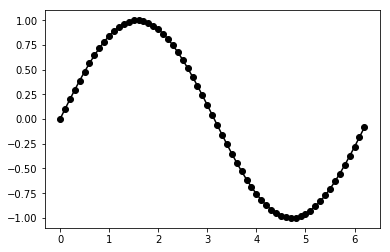

In [0]:
import matplotlib.pyplot as plt
plt.plot(x,y,'ko-')

**HANDS-ON:** If `z = np.cos(x)`, what do you think will be the return result of the following expression:

```
y*y+z*z
```
(don't just run it, try to guess the result first!)

In [0]:
#@title SOLUTION
z = np.cos(x)
y*y+z*z

Another example, generating a polynomial function from argument x :

In [0]:
a = 2
b = 3
c = -1
y = a * x**2 + b * x + c

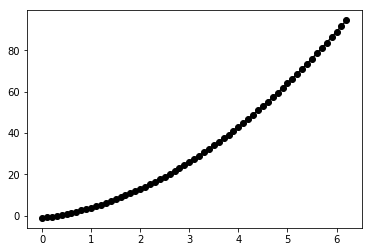

In [0]:
plt.plot(x,y,'ko-')

Besides vectorized functions, all numpy objects support a number of *methods* that can be used to operate on their elements in various ways. Combining these methods with the vector ufuncs makes for a really powerful way of making all sorts of computations with numpy arrays. 

Here are some examples of the available numpy methods:

In [6]:
import numpy as np
x = np.array([2, 5, 4, 3, 1, 6])
print(x.sum())
print(x.mean())
print(x.var())
print(x.std())
print(x.max())
print(x.min())
print(x.argmax())
print(x.argmin())

21
3.5
2.9166666666666665
1.707825127659933
6
1
5
4


**HANDS-ON:** The purpose of most of these functions is pretty obvious, but can you guess what the "argmax" and "argmin" functions do ?

Example: the Root Mean Square Deviation of two arrays X and Y is defined as:

$$ \text{RMSD} = \sqrt{\frac{1}{N}\sum_i^N (X_i-Y_i)^2} $$

Let's calculate with a numpy expression:

In [25]:
x = np.array([1,2,3])
y = np.array([4,5,7])
np.sqrt(((x-y)**2).mean())

3.366501646120693

The expression:


```
np.sqrt(((x-y)**2).mean())
```

is a good example of chaining of various numpy operations. Analyze it carefully, working from the inside to the outside, and try to understand what it does.


**HANDS-ON:** The sample covariance of two random variables X and Y, is 


$$ {\displaystyle S_{XY}={\frac {1}{N-1}}\sum _{i=1}^{N}\left(X_{i}-{\bar {X}}\right)\left(Y_{i}-{\bar {Y}}\right),}$$

where $\bar{X}$ and $\bar{Y}$ are the sample means of the wariables:

$$ \bar X ={\frac {1}{N}}\sum _{i=1}^{N} X_{i} \quad \text{and} \quad \bar Y ={\frac {1}{N}}\sum _{i=1}^{N} Y_{i}$$

Write a numpy expression that calculates the covariance of two arrays "x" and "Y" (which must have the same lenght!)
<br>
<br>
**NOTE:** $S_{XX}$ is 

$$ {\displaystyle S_{XX}={\frac {1}{N-1}}\sum _{i=1}^{N}\left(X_{i}-{\bar {X}}\right)\left(X_{i}-{\bar {X}}\right) = {\frac {1}{N-1}}\sum _{i=1}^{N}\left(X_{i}-{\bar {X}}\right)^2}$$  

which is simply the sample variance $S_X$ of the random variable X. So the variance is simply covariance of a random variable with itself. 

In [0]:
#@title SOLUTION
x = np.array([1,3,5,6,11,14])
y = np.array([3,9,17,22,31,35])
((x-x.mean())*(y-y.mean())).sum()/(len(x)-1)

**HANDS-ON:** Now let's caculate the Pearson correlation coeficient, 

$${\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}$$

where $\sigma _{X}$ and $\sigma _{Y}$ are *standard deviations* of the two random variables.

For two sizes $n$ samples of $X$ and $Y$, the sample correlation coefficient is given by:

$${\displaystyle r_{XY}={\frac {\sum _{i=1}^{n}(X_{i}-{\bar {X}})(Y_{i}-{\bar {Y}})}{{\sqrt {\sum _{i=1}^{n}(X_{i}-{\bar {X}})^{2}}}{\sqrt {\sum _{i=1}^{n}(Y_{i}-{\bar {Y}})^{2}}}}}} $$

1. Define a function named `covar` such that `covar(x,y)` returns the covariance of random samples x and y.
2. Using `covar`, implement another function named `pearson` that calculates the sample Pearson correlation coefficient $r_{XY}$



In [13]:
#@title SOLUTION
def covar(x,y):
  return ((x-x.mean())*(y-y.mean())).sum()/(len(x)-1)

def pearson(x,y):
  return covar(x,y)/(np.sqrt(covar(x,x))*np.sqrt(covar(y,y)))

pearson(x,y)

0.9765331878498119

You can actually check the correctness of your solution by checking your result agains that of the following command:

```
np.corrcoeof(x,y),
```

a numpy  function that implements the Pearson correlation coefficient (sorry for wasting your time...).


In [14]:
np.corrcoef(x,y)

array([[1.        , 0.97653319],
       [0.97653319, 1.        ]])

In [12]:
np.cov(x,y)[0,1]

59.6

In [0]:
(np.multiply.reduce(a))**(1./6)

2.993795165523909

In [21]:
np.roots((1,0,2))

array([-0.+1.41421356j,  0.-1.41421356j])

In [0]:
from functools import reduce

In [0]:
reduce(lambda a,b : a/b,[1,2,3,4])

0.041666666666666664

In [0]:
((1/2)/3)/4

0.041666666666666664

In [0]:
list(filter(lambda a : a % 2,[1,2,3,4]))

[1, 3]

In [0]:
list(map(lambda x : x*x, [1,2,3,4]))

[1, 4, 9, 16]

In [0]:
range(10)

range(0, 10)

In [0]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [0]:
np.outer([1, 2, 3], [4, 5, 6])

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [0]:
np.multiply.outer([1, 2, 3], [4, 5, 6])

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [0]:
x = np.arange(10)
y = 2 * x + 10 + np.random.randn(10)

In [0]:
C = (x*y-x.mean()*y.mean()).sum()
Y = (y*y-y.mean()**2).sum()
C,X,Y
C/(np.sqrt(X)*np.sqrt(Y))

0.9930923312521637

In [0]:
np.corrcoef(x,y)

array([[1.        , 0.99309233],
       [0.99309233, 1.        ]])

In [0]:
a = np.array([1,2,7,3,4])

In [30]:
a[a.argsort()]

array([1, 2, 3, 4, 7])

In [0]:
a.partition?

In [31]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__doc__',
 '__file__',
 '__git_revision__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_arg',
 '_distributor_init',


In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
dataset = pd.read_csv(url)

In [38]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
